# Принятие решений в бизнесе
## Заказчик

Интернет-магазин

## Цель проекта

Необходимость приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга;

Анализа результатов проведенного А/В-тестирования и аргументация решения по результатам теста.

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Входные данные

список гипотез (файл hypothesis.csv)
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

информация о заказах пользователей в интернет-магазине (файл orders.csv.)
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

информация о посещениях пользователями интернет-магазина (файл visitors.csv)
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


## Этап 1. Приоритизация гипотез.


В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задачи на 1 Этап
    Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

## Этап 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
### Задачи на 2 Этап


Проанализировать A/B-тест:

    - Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
    - Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
    - Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
    - Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
    - Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
    - Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
    - Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
    - Построить точечный график стоимостей заказов. Сделать выводы и предположения.
    - Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов. 
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    
    
По итогам анализа принять решение по результатам теста и объяснить его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

### Общий план
Перед выполнением любой из задач, в первую очередь необходимо подготовить набор библиотек, познакомится с данными.

Сам процесс исследования будет проведен в следующем порядке (основные этапы):

    - загрузка библиотек и знакомство с данными
    - предобработка данных
    - формирование временных таблиц, включая новые сводные (если потребуется)
    - проведение 1 Этапа - приоретизация гипотез ( с использованием фреймворков ICE и RICE)
    - проведение 2 Этапа (Анализ А/В тестов)
    - Общие выводы по результатам

*Итоговая цель анализа* - оценка результатов текущего этапа тестирования, отработка гипотез, сформированных с отделом маркетинга, определение целесообразности проведения дальнейшего тестирования.

# Подготовка, знакомство и предобработка 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import stats as st
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')

## Знакомство с данными

In [3]:
display (hypothesis.shape)
display (hypothesis.head ())
display (hypothesis.info ())

(9, 5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

In [4]:
display (orders.shape)
display (orders.head ())
display (orders.info ())

(1197, 5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [5]:
display (orders['date'].max ())
display (orders['date'].min ())

'2019-08-31'

'2019-08-01'

In [6]:
display (visitors.shape)
display (visitors.head ())
display (visitors.info ())

(62, 3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [7]:
display (visitors['date'].max ())
display (visitors['date'].min ())

'2019-08-31'

'2019-08-01'

In [8]:
display (orders ['group'].unique ())
display (visitors ['group'].unique ())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

По результатам первичного знакомства с данными, предварительно, данные без пропусков, безотлагательных корректировок не требуют. Загруженные даты корректны, период с 1 по 31 августа 2019 года.
В группах только 2 значения.

### Обработка пропусков и дубликатов

In [9]:
print (f' Явные дубликаты во всех строках и столбцах {orders.duplicated ().sum ()}')
print ()
duplicates = orders.duplicated()
duplicate_rows = orders.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

 Явные дубликаты во всех строках и столбцах 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  0 non-null      int64 
 1   visitorId      0 non-null      int64 
 2   date           0 non-null      object
 3   revenue        0 non-null      int64 
 4   group          0 non-null      object
dtypes: int64(3), object(2)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [transactionId, visitorId, date, revenue, group]
Index: []


In [10]:
print (f' Явные дубликаты во всех строках и столбцах {visitors.duplicated ().sum ()}')
print ()
duplicates = visitors.duplicated()
duplicate_rows = visitors.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

 Явные дубликаты во всех строках и столбцах 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      0 non-null      object
 1   group     0 non-null      object
 2   visitors  0 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [date, group, visitors]
Index: []


In [11]:
display (hypothesis.isna ().sum ())
display (orders.isna ().sum ())
display (visitors.isna ().sum ())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [12]:
orders_a = orders.query ('group=="A"')
orders_b = orders.query ('group=="B"')
duples = orders_a.merge (orders_b, on='visitorId')
duples ['visitorId'].value_counts ().count ()

58

Вывод по результатам знакомства:

    - аномалий не выявлено
    - пропусков не выявлено
    - значения в части определения параметров таблиц корректны (2 группы)
    - в таблице с гипотезами используется диапазон значений от 1 до 10, ошибок (меньше 0 или больше 10) нет
    - временной интервал идентичный - с 1 по 31 августа 2019 года
    - 58 клиентов попали сразу в обе группы.

Часть 1. Приоритизация гипотез.

Дан файл из 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Применим  два фреймворка по приоритизации, выведем два разных списка по убыванию приоритета.

In [13]:
#ICE
hypothesis['ICE'] = round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
display(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False))

#RICE
hypothesis['RICE'] = round(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
display(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


В способе ICE лидируют гипотезы: 
-Запустить акцию, дающую скидку на товар в день рождения   
-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Стоит обратить внимание на:

-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

В методике RICE безоговорочный лидер гипотеза:
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

С большим отрываом отстают:

-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

В разработке гипотез я бы отталкивался от второго списка, т.к. он использует параметр REACH, т.е. сколько пользователей затронет изменение (параметр вовлечённости).

Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест.


1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


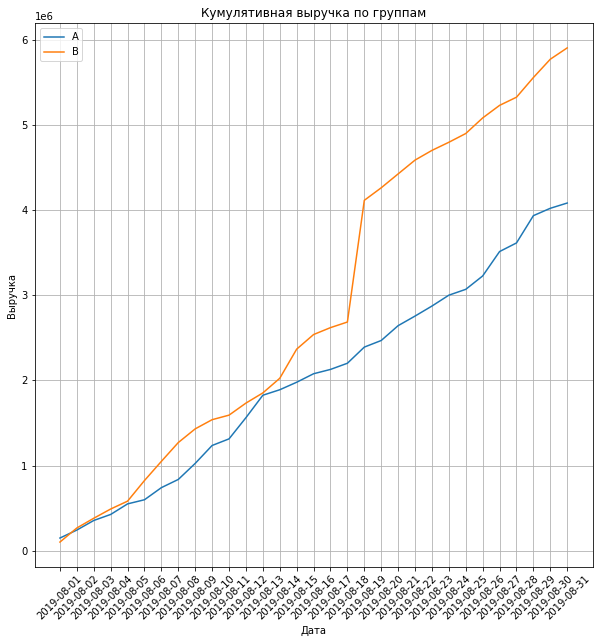

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend() 
plt.show()



Как видно из графика, примерно до 5-го августа кумулятивная выручка примерно одинаково растет, как в группе А, так и в группе В. Однако, начиная с 13 августа, группа В показывает куда более существенный рост. В районе 18-19 авугста наблюдается резкий скачок в группе В, с последующим равномерным ростом. Группа А, также увеличивается со временнем (все таки расчет идет кумулятивной выручки), но заметно меньшими темпами, чем группа В.

Стоит сразу разобраться, что произошло в группе В в период 18-19 августа

In [15]:
# сделаем срез данных нашей сгруппированной таблицы по периоду 18-19 августа
cumulativeRevenueB_18_19 = cumulativeRevenueB.query('date >= "2019-08-18" and date <= "2019-08-19"')
diff = (cumulativeRevenueB_18_19.loc[37, 'revenue'] - cumulativeRevenueB_18_19.loc[35, 'revenue']) / \
cumulativeRevenueB_18_19.loc[35, 'revenue'] * 100

display (cumulativeRevenueB_18_19)
display (diff)

,date,revenue,orders
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403


53.22373345551903

In [16]:
orders_19_В = orders.query ('date=="2019-08-19" and group=="B"')
display (orders_19_В.sort_values (by = 'revenue', ascending=False))
display (orders_19_В[orders_19_В['revenue'] != 1294500]['revenue'].mean())

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B
423,4161654914,990904712,2019-08-19,11249,B
523,1739748874,522292794,2019-08-19,4880,B
367,1033377712,3860669668,2019-08-19,3990,B
529,90109939,2075769885,2019-08-19,3525,B
426,19467429,2397843657,2019-08-19,2630,B


6771.0

Вы видим очень большой заказ на сумму 1 294 500, хотя за весь период среднее значение значительно меньше,  за 19 августа меньше - 6771. Пока данные не очищаем, так как у нас впереди будет обособленный анализ "очищенных" данных, но мы уже понимаем, что в группе В есть аномально крупные заказы.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

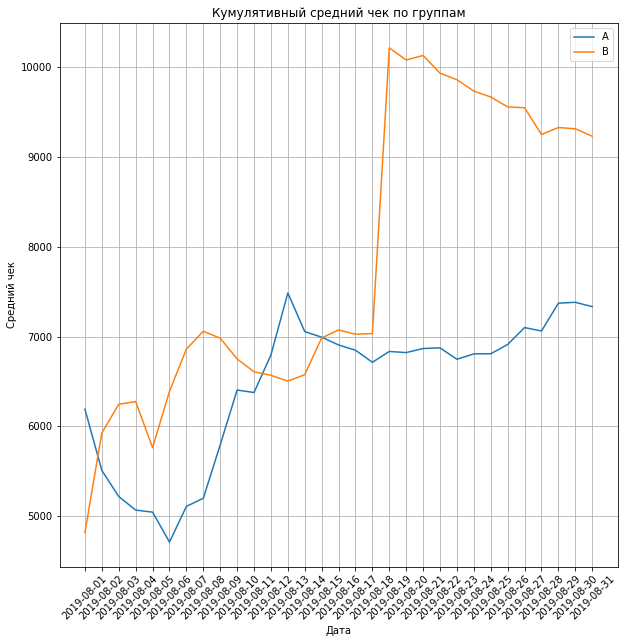

In [17]:
plt.figure(figsize=(10,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend() 


На графике мы опять наблюдаем за скачком среднего чека в отмеченный ранее день - 19 августа, но даже без "аномалии", группа В показывает больший рост начиная с 15 августа. Стоит отметить, что ранее на общей сумме выручки мы отмечали, что после 13-го августа группа В показывала стабильно более высокий рост выручки, но на среднем чеке мы видим, что 13-го августа контрольная группа вырывалась вперед, данные всплески мы оценим в следующих этапах анализа.

В части скачка группы В, однозначного выхода на плато мы не наблюдаем, наоборот есть некоторое падение среднего чека после скачка, что логично, если принять за допущение, что скачок произошел по причине аномально крупного заказа, и "истинный" средний чек может себя показать, или после чистки данных, или после большего периода наблюдений.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

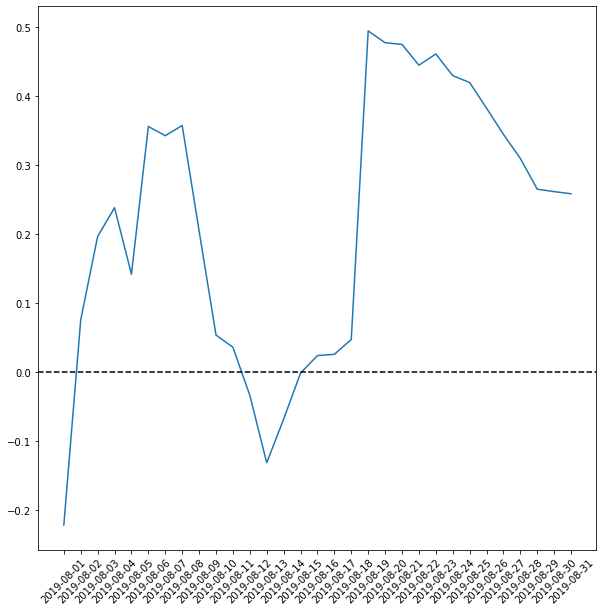

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 

Группа В, после 15 августа показывает стабильно большее значение, всплеск 19 августа виден и тут конечно, но пока общая тенденция просматривается- показатели группы В значительно лучше.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

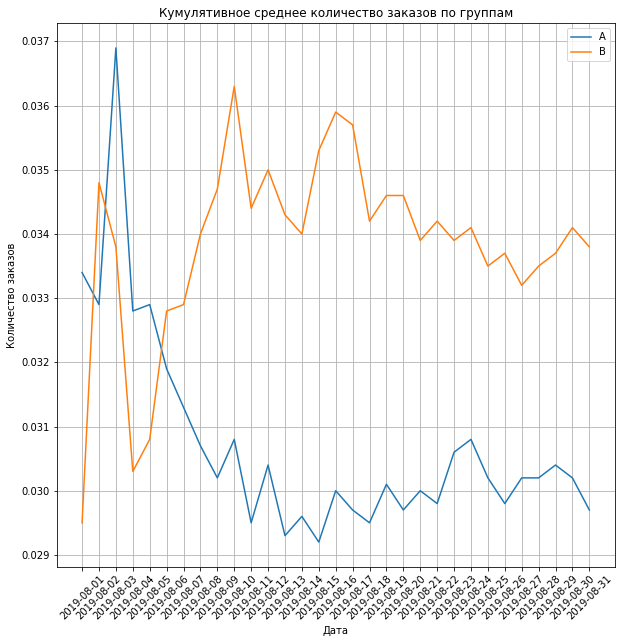

In [19]:
cumulativeData['conversion'] = (cumulativeData['orders']/cumulativeData['visitors']).round(4)

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Кумулятивное среднее количество заказов по группам")
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.legend()
plt.show()

Если в общем и целом, обе группы показывают сопостовимые показатели среднего количества заказов на посетителя, в диапазоне от 3,0 до 3,7, да, значение и в группе А и в группе В, меньше 4, но если опираться на конкретные цифры, показатель среднего количества заказов в группе В лучше, в период с 1 по 5 августа обе группы показывают всплеск, причем группа А показывает всплеск почти до 3.7, но уже после 6 августа группы меняются местами, и группа В имеет стабильный рост количества заказов на посетителя с выходом на потенциальное плато в районе 3,3-3,4, а группа А наоборот проседает и закрепляется около 3,0

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

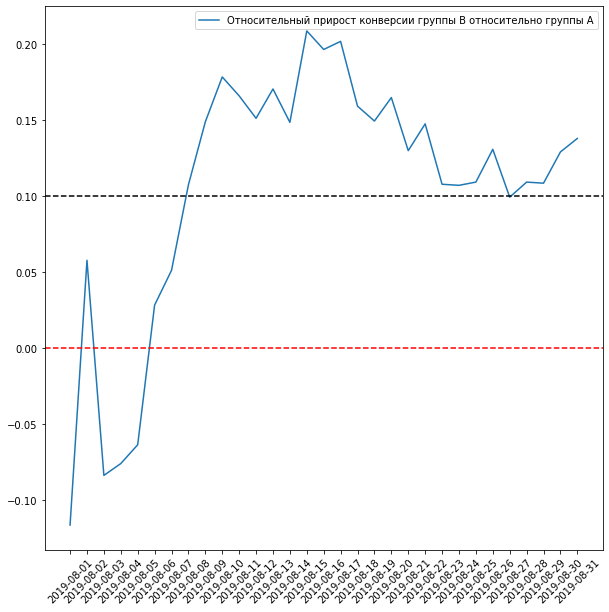

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)
plt.legend()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')

Как и отмечалось на прошлом этапе, начиная с 6 августа кум.сред.количество заказов группы В значительно лучше контрольной, после указанной даты, отношение переходит границу 0, и далее к концу наблюдаемого периода закрепляется в диапазоне 0,10-0,15, без тенденции на снижение. 

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0, 0.5, 'Количество заказов')

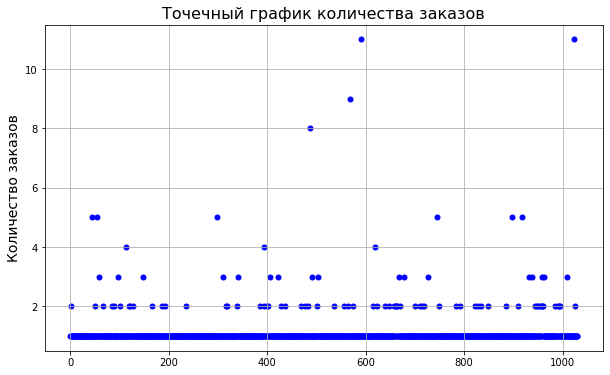

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['orders'], marker='o', s=25, color='blue')
plt.grid(True)
plt.title("Точечный график количества заказов", fontsize=16)

plt.ylabel("Количество заказов", fontsize=14)

Большинство пользователей сделали заказ 1-2 раза, но есть пользователи с 5 заказами. 8, 9 и 10 заказов, скорее всего выбросы.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [22]:
percentiles = np.percentile(ordersByUsers['orders'], [95,96,97,98,99])
display('Процентили количества заказов на одного кользователя 95,96,97,98,99:', percentiles)

percentiles_98 = np.percentile(ordersByUsers['orders'], [98])
display('Процентили количества заказов на одного кользователя - 98%:', percentiles_98)

'Процентили количества заказов на одного кользователя 95,96,97,98,99:'

array([2., 2., 2., 3., 4.])

'Процентили количества заказов на одного кользователя - 98%:'

array([3.])

95% пользователей вошли в 2 заказа, 99% включают пользователей с заказами до 4-х, но мы видим, что для 98% граница в районе 3-х заказов на пользователя. Оставляет для расчетов 98%

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

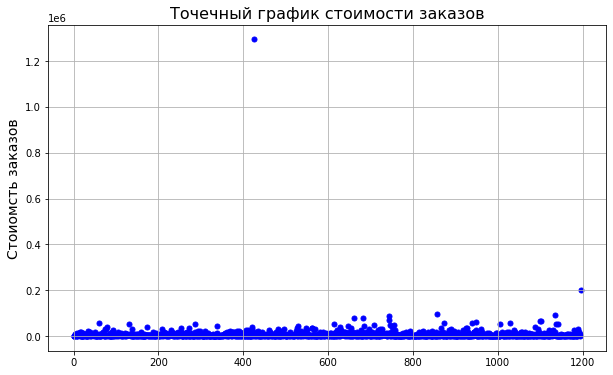

In [23]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'], marker='o', s=25, color='blue')
plt.grid(True)
plt.title("Точечный график стоимости заказов", fontsize=16)

plt.ylabel("Стоиомсть заказов", fontsize=14)
plt.show()

Text(0, 0.5, 'Стоиомсть заказов')

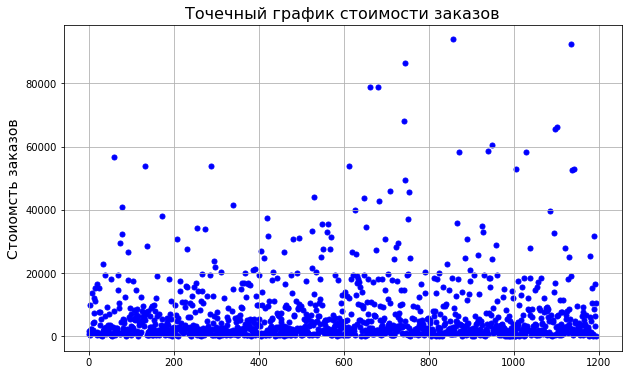

In [24]:
orders_drop_anomaly = orders.query ('revenue <= 150000')
x_values = pd.Series(range(0, len(orders_drop_anomaly)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_drop_anomaly['revenue'], marker='o', s=25, color='blue')
plt.grid(True)
plt.title("Точечный график стоимости заказов", fontsize=16)

plt.ylabel("Стоиомсть заказов", fontsize=14)

Дорогих заказов не очень много, основная масса стоимостей сконцентрирована до 20000 единиц измерения. Теперь график стал более наглядный.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [25]:
percentiles = np.percentile(orders['revenue'], [95,96,97,98,99])
display('Процентили количества заказов на одного кользователя 95,96,97,98,99:', percentiles)
percentiles_99 = np.percentile(orders['revenue'], [99])
display('Процентили количества заказов на одного кользователя 95,96,97,98,99:', percentiles_99)

'Процентили количества заказов на одного кользователя 95,96,97,98,99:'

array([28000. , 31382. , 35485. , 44133.2, 58233.2])

'Процентили количества заказов на одного кользователя 95,96,97,98,99:'

array([58233.2])

В диапазон до 95% вошли заказы с стоимостью до 28000, 98 процентов заказов в диапазоне до 58322. Учитывая результаты анализа графика и определения процентелей, останавливаемся на 99%

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Мы уже отмечали на прошлых этапах, что наблюдаем выбросы, но для определений их значимости необходимо провести дополнительное исследование.

Для начала, сформулируем гипотезы. **Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.**

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders'] 

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [27]:
print  ('alpha =',0.05)
display ("p-value {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

display ("Различие в средних {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05


'p-value 0.017'

'Различие в средних 0.138'

**Вывод**

По "сырым" данным наблюдается статистическая значимая разница, так как p-value меньше 0,05. Относительный выигрыш группы В к группе А около 13,8%.

Нулевую гипотезу отвергаем, статистическая значимость различий по "сырым" данным есть.


11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке между группами есть.**

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= percentiles_98[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= percentiles_98[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentiles_99[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display (abnormalUsers.head(5))
display (abnormalUsers.shape[0]) 
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

31

31


In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print  ('alpha =',0.05)
display ('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display ('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05


'0.010'

'0.174'

Результаты по среднему количеству заказов изменились. Нулевую гипотезу отвергаем, выйгрыш группы В после очистки данных, по сравнению с группой А около 17,4%

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [31]:
print  ('alpha =',0.05)
display (
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display (
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

alpha = 0.05


'0.798'

'-0.020'

Результат: Нулевую гипотезу не отвергаем, значение p-value больше 0,05, проигрыш группы В, после очистки данных, в среднем чеке составляет около 2%

14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

По итогам изучения результатов теста, получены следующие данные:

1.	На «сырых» данных:

    a.	Отказ от основной гипотезы в пользу альтернативной гипотезы – имеются статистически значимые различия в среднем количестве заказов между группами, выигрыш группы В составляет 13,8% 
    b.	Основную гипотезу не отвергаем – статистически значимых различий в среднем чеке нет, хоть выигрыш группы В по среднему чеку составляет 25,9%, но в ходе исследования пришли к пониманию, что данные значения получены благодаря случайному выбросу в виде аномально большого заказа.
    
2.	На «очищенных» данных:

    a.	Отказ от основной гипотезы в пользу альтернативной гипотезы – имеются статистически значимые различия в среднем количестве заказов между группами, выигрыш группы В составляет 17,4% 
    
    b.	Основную гипотезу не отвергаем – статистически значимых различий в среднем чеке нет.

    Как можем увидеть, после очистки от аномальных значений, оценка гипотез не изменилась, а вот результаты отношений претерпели существенные изменения.
    
    Так, после очистки уровень конверсии в группе В стал 17,4% против 13,8% до.
    
    Средний чек, после очистки сильно стал меньше в группе В, до очистки разница была 25,9%, а после очистки -2%. Данный момент предполагался на всем этапе работы с данными, так как были выявлены аномально большие заказы, в частности заказ на сумму более 1,294 млн. 

**Итог:** Проведение теста рекомендуется остановить, по результатам тестирования - группа В показала себя значительно более эффективной, с выигрышем в 17,4% в части среднего количества заказов на посетителя. Таким образом, на каждого посетителя из группы В приходится на 17.4% больше заказов чем на каждого посетителя из группы А, что в свою очередь может увеличить общую выручку относительно посетителей из группы В.